In [29]:
import simpy
import numpy as np
import matplotlib.pyplot as plt

## Task 1

In [30]:
# Parámetros del problema
TIEMPO_SIMULACION = 3600  # Tiempo de simulación en segundos (1 hora)
SOLICITUDES_POR_MINUTO = 2400  # Solicitudes por minuto (ajustar a 6000 para el tercer año)
SOLICITUDES_POR_SEGUNDO = SOLICITUDES_POR_MINUTO / 60  # Conversion a solicitudes por segundo
TIEMPO_SERVICIO_MOUNTAIN = 1 / 100  # Servidor Mountain Mega Computing (100 solicitudes por segundo)
TIEMPO_SERVICIO_PIZZITA = 1 / 10  # Servidores Pizzita Computing (cada uno maneja 10 solicitudes por segundo)

In [31]:
# Inicializamos contadores globales
class Contador:
    def __init__(self):
        self.solicitudes_atendidas = 0
        self.tiempo_ocupado = 0
        self.tiempo_desocupado = 0
        self.tiempo_en_cola = 0
        self.tiempo_total_cola = 0


In [32]:
def proceso_solicitud(env, nombre, tiempo_servicio, contador):
    tiempo_llegada = env.now
    with servidor.request() as req:
        yield req
        # La solicitud es atendida
        tiempo_espera = env.now - tiempo_llegada
        contador.tiempo_total_cola += tiempo_espera
        contador.solicitudes_atendidas += 1
        contador.tiempo_en_cola += tiempo_espera
        tiempo_inicio = env.now
        contador.tiempo_ocupado += tiempo_servicio
        yield env.timeout(tiempo_servicio)

In [33]:
def generar_solicitudes(env, tasa_llegada, tiempo_servicio, num_servidores, contador):
    global servidor
    servidor = simpy.Resource(env, capacity=num_servidores)
    
    while True:
        yield env.timeout(np.random.exponential(1/tasa_llegada))
        env.process(proceso_solicitud(env, 'solicitud', tiempo_servicio, contador))

In [34]:
def ejecutar_simulacion(tasa_llegada, tiempo_servicio, num_servidores, tiempo_simulacion):
    env = simpy.Environment()
    contador = Contador()
    
    # Generar las solicitudes
    env.process(generar_solicitudes(env, tasa_llegada, tiempo_servicio, num_servidores, contador))
    
    # Ejecutar la simulación
    env.run(until=tiempo_simulacion)
    
    # Calcular estadísticas
    tiempo_total = tiempo_simulacion
    tiempo_ocioso = tiempo_total - contador.tiempo_ocupado
    solicitudes_atendidas = contador.solicitudes_atendidas
    tiempo_promedio_cola = contador.tiempo_total_cola / solicitudes_atendidas if solicitudes_atendidas > 0 else 0
    solicitudes_en_cola_por_segundo = contador.tiempo_en_cola / tiempo_total if tiempo_total > 0 else 0
    
    # Resultados
    return {
        'Solicitudes Atendidas': solicitudes_atendidas,
        'Tiempo Ocupado': contador.tiempo_ocupado,
        'Tiempo Desocupado': tiempo_ocioso,
        'Tiempo Promedio en Cola': tiempo_promedio_cola,
        'Solicitudes en Cola por Segundo': solicitudes_en_cola_por_segundo,
        'Ultima Solicitud Salida': tiempo_total
    }

In [35]:
# Simulamos Mountain Mega Computing
resultados_mountain = ejecutar_simulacion(SOLICITUDES_POR_SEGUNDO, TIEMPO_SERVICIO_MOUNTAIN, 1, TIEMPO_SIMULACION)
print("Resultados Mountain Mega Computing:", resultados_mountain)

# Simulamos Pizzita Computing con 10 servidores
resultados_pizzita = ejecutar_simulacion(SOLICITUDES_POR_SEGUNDO, TIEMPO_SERVICIO_PIZZITA, 10, TIEMPO_SIMULACION)
print("Resultados Pizzita Computing:", resultados_pizzita)

Resultados Mountain Mega Computing: {'Solicitudes Atendidas': 144221, 'Tiempo Ocupado': 1442.2099999988334, 'Tiempo Desocupado': 2157.790000001167, 'Tiempo Promedio en Cola': 0.0033429838480128864, 'Solicitudes en Cola por Segundo': 0.13392457598451848, 'Ultima Solicitud Salida': 3600}
Resultados Pizzita Computing: {'Solicitudes Atendidas': 143442, 'Tiempo Ocupado': 14344.200000034652, 'Tiempo Desocupado': -10744.200000034652, 'Tiempo Promedio en Cola': 9.296170480220357e-05, 'Solicitudes en Cola por Segundo': 0.0037040591278438015, 'Ultima Solicitud Salida': 3600}


### Mountain Mega Computing
- **Solicitudes Atendidas**: 144,221
- **Tiempo Ocupado**: 1,442.21 segundos
- **Tiempo Desocupado**: 2,157.79 segundos
- **Tiempo Promedio en Cola**: 0.00334 segundos
- **Solicitudes en Cola por Segundo**: 0.1339
- **Última Solicitud Salida**: 3,600 segundos

### Pizzita Computing
- **Solicitudes Atendidas**: 143,442
- **Tiempo Ocupado**: 14,344.20 segundos
- **Tiempo Desocupado**: -10,744.20 segundos
- **Tiempo Promedio en Cola**: 0.000093 segundos
- **Solicitudes en Cola por Segundo**: 0.0037
- **Última Solicitud Salida**: 3,600 segundos


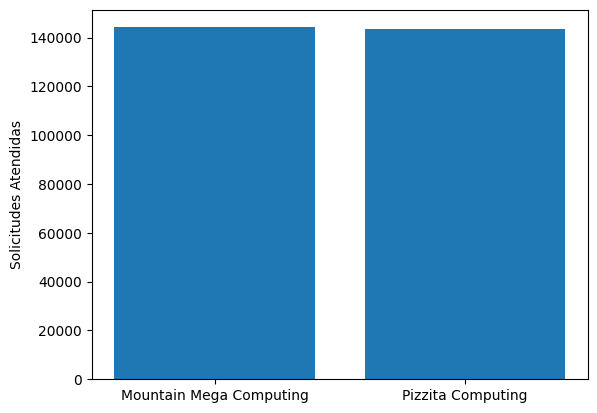

In [36]:
# comparación en gráficas de los resultados obtenidos
fig, ax = plt.subplots()
ax.bar(['Mountain Mega Computing', 'Pizzita Computing'], [resultados_mountain['Solicitudes Atendidas'], resultados_pizzita['Solicitudes Atendidas']])
ax.set_ylabel('Solicitudes Atendidas')
plt.show()

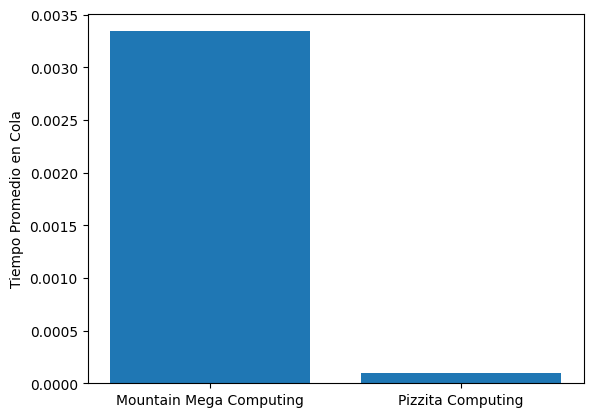

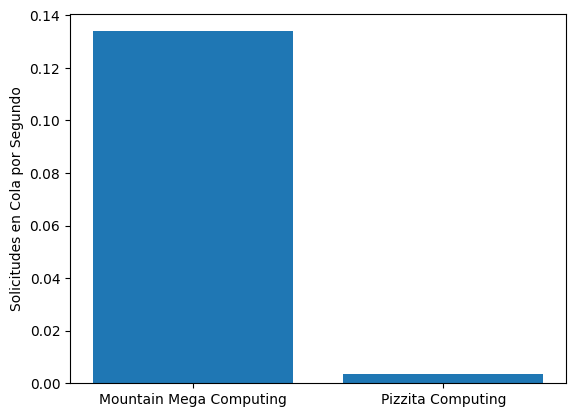

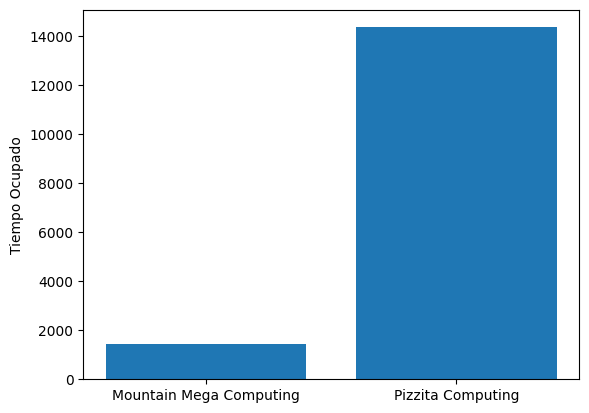

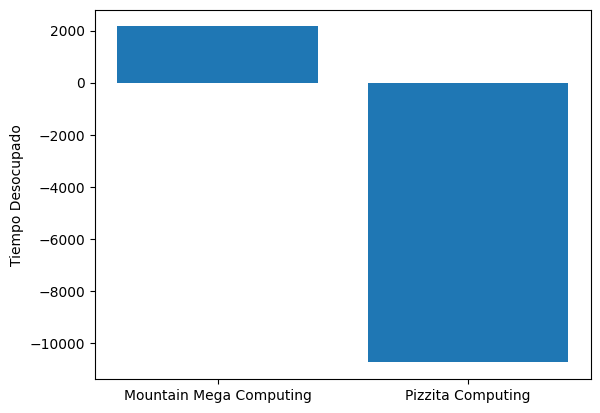

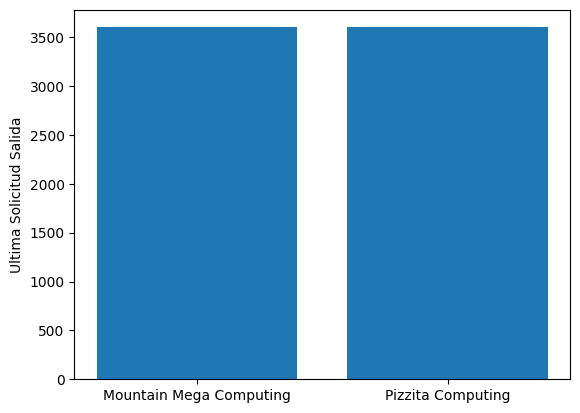

In [37]:
# comparación de las métricas individuales
fig, ax = plt.subplots()
ax.bar(['Mountain Mega Computing', 'Pizzita Computing'], [resultados_mountain['Tiempo Promedio en Cola'], resultados_pizzita['Tiempo Promedio en Cola']])
ax.set_ylabel('Tiempo Promedio en Cola')
plt.show()

fig, ax = plt.subplots()
ax.bar(['Mountain Mega Computing', 'Pizzita Computing'], [resultados_mountain['Solicitudes en Cola por Segundo'], resultados_pizzita['Solicitudes en Cola por Segundo']])
ax.set_ylabel('Solicitudes en Cola por Segundo')
plt.show()

fig, ax = plt.subplots()
ax.bar(['Mountain Mega Computing', 'Pizzita Computing'], [resultados_mountain['Tiempo Ocupado'], resultados_pizzita['Tiempo Ocupado']])
ax.set_ylabel('Tiempo Ocupado')
plt.show()

fig, ax = plt.subplots()
ax.bar(['Mountain Mega Computing', 'Pizzita Computing'], [resultados_mountain['Tiempo Desocupado'], resultados_pizzita['Tiempo Desocupado']])
ax.set_ylabel('Tiempo Desocupado')
plt.show()

fig, ax = plt.subplots()
ax.bar(['Mountain Mega Computing', 'Pizzita Computing'], [resultados_mountain['Ultima Solicitud Salida'], resultados_pizzita['Ultima Solicitud Salida']])
ax.set_ylabel('Ultima Solicitud Salida')
plt.show()

## Task 2

In [38]:
def encontrar_minimo_servidores(tasa_llegada, tiempo_servicio, tiempo_simulacion):
    num_servidores = 1
    while True:
        resultados = ejecutar_simulacion(tasa_llegada, tiempo_servicio, num_servidores, tiempo_simulacion)
        print(f"Servidores: {num_servidores}, Tiempo Promedio en Cola: {resultados['Tiempo Promedio en Cola']}")
        
        # Si el tiempo promedio en cola es 0 o cercano a 0, encontramos el número adecuado
        if resultados['Tiempo Promedio en Cola'] <= 0.01:  # Umbral para asegurar que no hay espera
            return num_servidores
        num_servidores += 1

In [39]:
# Encontrar el número mínimo de servidores en Pizzita Computing
servidores_necesarios = encontrar_minimo_servidores(SOLICITUDES_POR_SEGUNDO, TIEMPO_SERVICIO_PIZZITA, TIEMPO_SIMULACION)
print(f"Servidores necesarios en Pizzita Computing para no tener cola: {servidores_necesarios}")


Servidores: 1, Tiempo Promedio en Cola: 1347.2268947589823
Servidores: 2, Tiempo Promedio en Cola: 898.9087327941621
Servidores: 3, Tiempo Promedio en Cola: 455.36039673658104
Servidores: 4, Tiempo Promedio en Cola: 4.530535947739182
Servidores: 5, Tiempo Promedio en Cola: 0.02804888272972349
Servidores: 6, Tiempo Promedio en Cola: 0.007736536684762186
Servidores necesarios en Pizzita Computing para no tener cola: 6


## Task 3

In [40]:
SOLICITUDES_POR_MINUTO = 6000

In [41]:
# Simulamos Mountain Mega Computing con la nueva tasa de 6000 solicitudes por minuto
resultados_mountain_6000 = ejecutar_simulacion(SOLICITUDES_POR_SEGUNDO, TIEMPO_SERVICIO_MOUNTAIN, 1, TIEMPO_SIMULACION)
print("Resultados Mountain Mega Computing (6000 solicitudes por minuto):", resultados_mountain_6000)

Resultados Mountain Mega Computing (6000 solicitudes por minuto): {'Solicitudes Atendidas': 144468, 'Tiempo Ocupado': 1444.6799999988311, 'Tiempo Desocupado': 2155.320000001169, 'Tiempo Promedio en Cola': 0.0033290093298682, 'Solicitudes en Cola por Segundo': 0.13359314440761086, 'Ultima Solicitud Salida': 3600}


In [42]:
print(f"tiempo promedio en cola: {resultados_mountain_6000['Tiempo Promedio en Cola']:.4f}")

tiempo promedio en cola: 0.0033


In [43]:
# Simulamos Pizzita Computing con 10 servidores y la nueva tasa de 6000 solicitudes por minuto
resultados_pizzita_6000 = ejecutar_simulacion(SOLICITUDES_POR_SEGUNDO, TIEMPO_SERVICIO_PIZZITA, 10, TIEMPO_SIMULACION)
print("Resultados Pizzita Computing (6000 solicitudes por minuto):", resultados_pizzita_6000)

Resultados Pizzita Computing (6000 solicitudes por minuto): {'Solicitudes Atendidas': 143987, 'Tiempo Ocupado': 14398.70000003485, 'Tiempo Desocupado': -10798.70000003485, 'Tiempo Promedio en Cola': 0.00010387688871612198, 'Solicitudes en Cola por Segundo': 0.004154700437657849, 'Ultima Solicitud Salida': 3600}


In [44]:
print(f"tiempo promedio en cola: {resultados_pizzita_6000['Tiempo Promedio en Cola']:.4f}")

tiempo promedio en cola: 0.0001


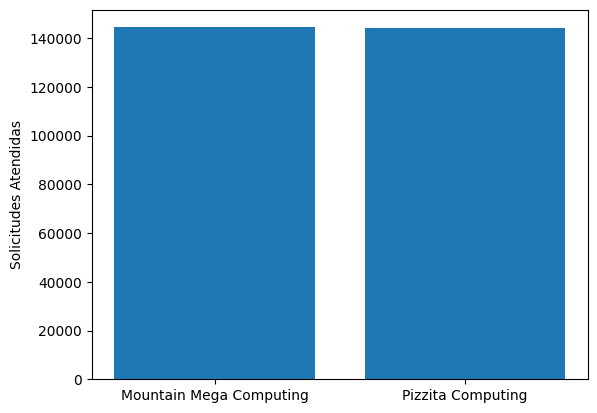

In [45]:
# comparacion de resultados con la nueva tasa de solicitudes
fig, ax = plt.subplots()
ax.bar(['Mountain Mega Computing', 'Pizzita Computing'], [resultados_mountain_6000['Solicitudes Atendidas'], resultados_pizzita_6000['Solicitudes Atendidas']])
ax.set_ylabel('Solicitudes Atendidas')
plt.show()